<a href="https://colab.research.google.com/github/SilvanaBContreras/AA_TP1_G8/blob/main/AA_TP1_G8_clasif_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Levanto datos procesados en notebook EDA

In [2]:
URL_BASE = 'https://github.com/SilvanaBContreras/AA_TP1_G8/raw/refs/heads/main/'

archivos_a_cargar = {
    'X_train_completo.parquet': 'X_train',
    'y_train.parquet': 'y_train',
    'X_test_completo.parquet': 'X_test',
    'y_test.parquet': 'y_test',
    'X_train_reducido.parquet': 'X_train_short',
    'X_test_reducido.parquet': 'X_test_short',
}

def cargar_conjunto(nombre_archivo):
    """Carga un archivo Parquet desde la URL de GitHub."""
    full_url = URL_BASE + nombre_archivo
    data = pd.read_parquet(full_url)

    # Si es un DataFrame con una sola columna (que era originalmente una Series 'y'),
    # la convertimos de vuelta a Series con .squeeze()
    if data.shape[1] == 1:
        return data.squeeze()

    return data

# Crear un diccionario para almacenar todas las variables cargadas
variables_cargadas = {}

# Cargar y asignar dinámicamente
for nombre_archivo, nombre_variable in archivos_a_cargar.items():
    datos = cargar_conjunto(nombre_archivo)
    variables_cargadas[nombre_variable] = datos
    print(f"✅ Cargado {nombre_archivo} como la variable '{nombre_variable}'")

# Asignar las variables al espacio de nombres de la notebook
X_train = variables_cargadas['X_train']
y_train = variables_cargadas['y_train']
X_test = variables_cargadas['X_test']
y_test = variables_cargadas['y_test']
X_train_short = variables_cargadas['X_train_short']
X_test_short = variables_cargadas['X_test_short']

print("\n--- Verificación Final ---")
print(f"Variable X_train cargada. Dimensiones: {X_train.shape}")
print(f"Variable X_train_short cargada. Dimensiones: {X_train_short.shape}")
print("¡Estás lista para comenzar a entrenar y comparar modelos! 🎉")

✅ Cargado X_train_completo.parquet como la variable 'X_train'
✅ Cargado y_train.parquet como la variable 'y_train'
✅ Cargado X_test_completo.parquet como la variable 'X_test'
✅ Cargado y_test.parquet como la variable 'y_test'
✅ Cargado X_train_reducido.parquet como la variable 'X_train_short'
✅ Cargado X_test_reducido.parquet como la variable 'X_test_short'

--- Verificación Final ---
Variable X_train cargada. Dimensiones: (40257, 51)
Variable X_train_short cargada. Dimensiones: (40257, 49)
¡Estás lista para comenzar a entrenar y comparar modelos! 🎉


In [3]:
print("Dimensiones del conjunto de características (X):")
print(f"X_train: {X_train.shape}")
print("\nDimensiones del conjunto de características (X) sin correlacionadas:")
print(f"X_train_short: {X_train_short.shape}")
print("\nDimensiones de la variable objetivo (y):")
print(f"X_test: {X_test.shape}")
print("\nDimensiones de la variable objetivo (y) sin correlaciones:")
print(f"X_test_short: {X_test_short.shape}")
print("\nDimensiones de la variable objetivo (y):")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensiones del conjunto de características (X):
X_train: (40257, 51)

Dimensiones del conjunto de características (X) sin correlacionadas:
X_train_short: (40257, 49)

Dimensiones de la variable objetivo (y):
X_test: (17253, 51)

Dimensiones de la variable objetivo (y) sin correlaciones:
X_test_short: (17253, 49)

Dimensiones de la variable objetivo (y):
y_train: (40257,)
y_test: (17253,)


# Regresión logística con correl

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, \
                            confusion_matrix, roc_auc_score

model = LogisticRegression(penalty=None, max_iter=5000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Predicción de probabilidades para la clase positiva (necesaria para AUC-ROC)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Matriz de Confusión (usando y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Métrica de Probabilidad (usando y_pred_proba)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo ---")
print(f"Accuracy de la clasificación: {accuracy:.4f}")
print(f"Recall de la clasificación: {recall:.4f}")
print(f"Precisión de la clasificación: {precision:.4f}")
print(f"F1-score de la clasificación: {f1:.4f}")
print(f"AUC-ROC de la clasificación: {auc_roc:.4f} \n(Métrica clave para desbalance)")

print("\n--- Matriz de Confusión ---")
print("La matriz se interpreta como: \n[[TN, FP], \n[FN, TP]]")
print(conf_matrix)


--- Evaluación del Modelo ---
Accuracy de la clasificación: 0.8560
Recall de la clasificación: 0.9163
Precisión de la clasificación: 0.8607
F1-score de la clasificación: 0.8876
AUC-ROC de la clasificación: 0.9167 
(Métrica clave para desbalance)

--- Matriz de Confusión ---
[[4959 1588]
 [ 896 9810]]


In [10]:
print("\n--- Matriz de Confusión ---")
print("La matriz se interpreta como: \n[[TN, FP], \n[FN, TP]]")
print(conf_matrix)


--- Matriz de Confusión ---
La matriz se interpreta como: 
[[TN, FP], 
[FN, TP]]
[[4959 1588]
 [ 896 9810]]


# Regresión logística SIN correl

In [8]:

model_short = LogisticRegression(penalty=None, max_iter=5000)

model_short.fit(X_train_short, y_train)

y_pred_short = model_short.predict(X_test_short)

# Predicción de probabilidades para la clase positiva (necesaria para AUC-ROC)
y_pred_proba_short = model_short.predict_proba(X_test_short)[:, 1]


accuracy_short = accuracy_score(y_test, y_pred_short)
recall_short = recall_score(y_test, y_pred_short)
precision_short = precision_score(y_test, y_pred_short)
f1_short = f1_score(y_test, y_pred_short)

# Matriz de Confusión (usando y_pred)
conf_matrix_short = confusion_matrix(y_test, y_pred_short)

# Métrica de Probabilidad (usando y_pred_proba)
auc_roc_short = roc_auc_score(y_test, y_pred_proba_short)

print("--- Evaluación del Modelo ---")
print(f"Accuracy_short de la clasificación: {accuracy_short:.4f}")
print(f"Recall_short de la clasificación: {recall_short:.4f}")
print(f"Precisión_short de la clasificación: {precision_short:.4f}")
print(f"F1-score _short de la clasificación: {f1_short:.4f}")
print(f"AUC-ROC _short de la clasificación: {auc_roc_short:.4f} \n(Métrica clave para desbalance)")

print("\n--- Matriz de Confusión  _short---")
print("La matriz se interpreta como: [[TN, FP], \n[FN, TP]]")
print(conf_matrix_short)

--- Evaluación del Modelo ---
Accuracy_short de la clasificación: 0.8428
Recall_short de la clasificación: 0.9063
Precisión_short de la clasificación: 0.8502
F1-score _short de la clasificación: 0.8774
AUC-ROC _short de la clasificación: 0.9066 
(Métrica clave para desbalance)

--- Matriz de Confusión  _short---
La matriz se interpreta como: [[TN, FP], 
[FN, TP]]
[[4838 1709]
 [1003 9703]]


In [9]:
print("\n--- Matriz de Confusión  _short---")
print("La matriz se interpreta como: \n[[TN, FP], \n[FN, TP]]")
print(conf_matrix_short)


--- Matriz de Confusión  _short---
La matriz se interpreta como: 
[[TN, FP], 
[FN, TP]]
[[4838 1709]
 [1003 9703]]


# Log loss

In [11]:
from sklearn.metrics import log_loss

# función manual de los profes
def BinaryCrossEntropy(y_true, y_pred):
    """Calcula la Entropía Cruzada Binaria (Log Loss) manualmente."""
    # Usamos np.clip para evitar np.log(0), lo que daría un error (infinito)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss_manual = BinaryCrossEntropy(y_test, y_pred_proba)

# función de sklearn
loss_sklearn = log_loss(y_test, y_pred_proba)

print("--- Evaluación de la Función de Costo ---")
print(f'Log loss (sklearn): {loss_sklearn:.5f}')
print(f'Log loss (manual): {loss_manual:.5f}')

--- Evaluación de la Función de Costo ---
Log loss (sklearn): 0.34335
Log loss (manual): 0.34335


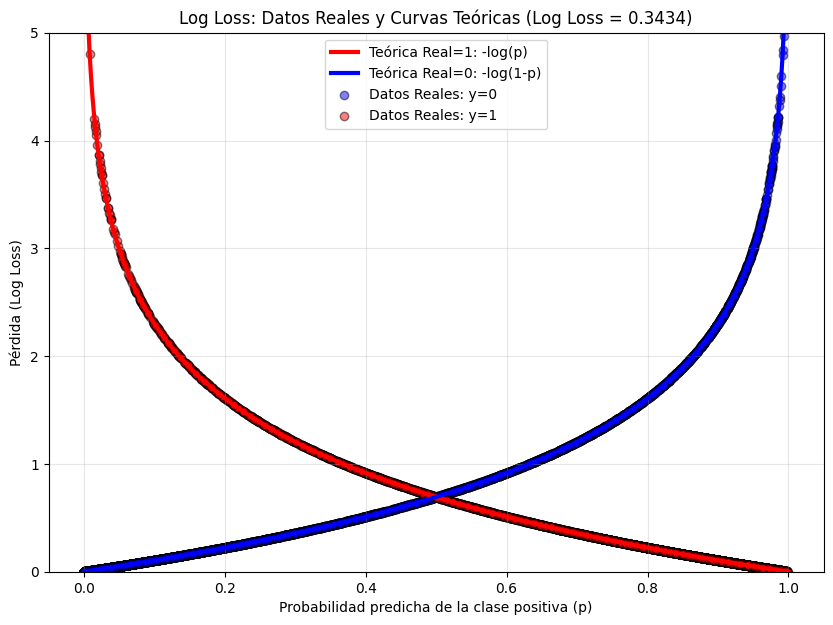

In [12]:
import matplotlib.pyplot as plt

# curvas teóricas
# p: Rango de probabilidades de 0 a 1 (evitando los bordes para el logaritmo)
p = np.linspace(1e-6, 1-1e-6, 500)
loss_y1 = -np.log(p)       # Pérdida teórica cuando la CLASE REAL es 1
loss_y0 = -np.log(1 - p)   # Pérdida teórica cuando la CLASE REAL es 0

# Pérdidas Reales del Modelo
# Extraemos las probabilidades donde la clase real es 0 (p0) y donde es 1 (p1)
p0 = y_pred_proba[y_test == 0]
p1 = y_pred_proba[y_test == 1]

# pérdida REAL para cada grupo:
# Si la clase real es 0, la pérdida es -log(1 - p)
loss0 = -np.log(np.clip(1 - p0, 1e-15, 1))
# Si la clase real es 1, la pérdida es -log(p)
loss1 = -np.log(np.clip(p1, 1e-15, 1))

plt.figure(figsize=(10,7))

# Curvas suaves (teóricas)
plt.plot(p, loss_y1, 'r-', linewidth=3, label="Teórica Real=1: -log(p)")
plt.plot(p, loss_y0, 'b-', linewidth=3, label="Teórica Real=0: -log(1-p)")

# Puntos reales (Scatter Plot)
# Puntos azules: Casos donde la CLASE REAL es 0.
# La pérdida es alta si p (prob. de ser 1) es alto.
plt.scatter(p0, loss0, color="blue", alpha=0.5, edgecolor="k", label="Datos Reales: y=0")
# Puntos rojos: Casos donde la CLASE REAL es 1.
# La pérdida es alta si p (prob. de ser 1) es bajo.
plt.scatter(p1, loss1, color="red", alpha=0.5, edgecolor="k", label="Datos Reales: y=1")

plt.xlabel("Probabilidad predicha de la clase positiva (p)")
plt.ylabel("Pérdida (Log Loss)")
plt.title(f"Log Loss: Datos Reales y Curvas Teóricas (Log Loss = {loss_sklearn:.4f})")
plt.legend()
plt.ylim(0, 5)
plt.grid(alpha=0.3)
plt.show()